In [41]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [60]:
disaster_dataset = ['0218f76dff06752d', '02eab4f9ad6c0334', '0693141ad6ca7df3', '0bdfcf59dd6b55ce',
                     '0ff480920c9928c5', '101b499a52d7f46a', '112caf3e075e5394', '132eac17a04c4517',
                    '1550f14052bfec04', '183c1d7389c3b9ea', '1b24087aa0f9867b', '1df5638d77ff56cb',
                    '1e2a454911be0c5f', '2341349abfc26e90', '24f67cf7b161ea6b', '2b3651e8ba31ee65',
                    '2c67ed27579a6ea8', '345744962c7f4265', '34d50632542ecbb7', '35242c3f7a36c7bb', 
                    '36aee059e225bdaf', '3c6bf73ad74f1cd0', '3d789ac66fb6f955', '3f297fa8108336de',
                    '3f75d6405bd8a83f', '56234c17e1d60456', '5b612117e5778a4f', '5c7d9dc0a050e458',
                    '5d9d3da7f32e3ed0', '5dc549862bd6b8be', '6210ca5e86ae3d4e', '626d848b9b97ac60',
                    '62f96f9bddee4d68', '676ed076e09c9831', '705926a75728804d', '73ec259eab888d00',
                    '7633472d1ca39fe2', '78d846a0565d3bcd', '7b9ec91e0a4e22a9', '7e8eb56044f4b6fd',
                    '7eaf75eb4e77e2fb', '818a844fd465ac22', '83b32c162d09a4f8', '84948dc5e331047f',
                    '85f047ee06e75976', '88f9239e83cdb66d', '8b8fc6e31886cf55', '8e81cdd4461f27c4',
                    '9272694dbd156cd5', '9e6328c01768659b', 'a052c41f030af85b', 'a0cfb16260ece855',
                    'a2a59c80cef68850', 'a2e91881336cf349', 'a7a0b76240849487', 'a8f397a0f65a323c',
                    'ade8e68f664d382f', 'b06aa91a6083c7c2', 'b3fec6a2d8c7536a', 'b85303b3bdfed978',
                    'b8bc1b2847a360f1', 'be4d426c54e723b4', 'be5fb6daa44a3de5', 'bf8d2df0e0e9c22d',
                    'bfdd567c7a0f948b', 'c5b72236f87adafc', 'c745a2779725f898', 'c9503eb51eee2f65', 
                    'cf2221aa10e29a2c', 'e22d5041146ddcf1', 'ef7aeb8f945dbab2', 'f5d7ec658b470898',
                    'fd00a73e3f447913','022b54e4e857ed33', '0de39b3791f2baa6', '15657f348712e734', '25099167e4022eba',
                    '26518efac4887b3c', '3797b764d267b064', '428509df148d1a27', '49aec59730a5a8aa',
                    '51255a7a1548080e', '52fde99971a5708c', '58d12e852edf194f', '5bbe14ccb14cd541', 
                    '64285be9eb0c2a46', '6c7b295c1bceb158', '6e16070bbbf48bde', '721af8090dfd27aa',
                    '874550cc18780297', '8a224c3b493fe762', '8cd19147d2c4f6b6', '91328c6645715517',
                    'a545a8059df4801f', 'b80089edc6bbc0ed', 'd0d6ed4f1ccd7041', 'd1db43f8dc0c3780', 
                    'e05bc81aa1d691d8', 'efd4e8e3e46acafc', 'f3c2b2265ca7bc45', 'fc365a2dd199e835',
                                        '00d425f0986ac579', '0128105921974df0', '01c4f65ea29a5632', '05b3130e553c6084',
                    '153e26395bea1973', '1656a46450a881f5', '17dba0da31436843', '189f6a62d7fa224c',
                    '2debae83fc6544cb', '4b2120ef0487e439', '502e1d8cb6b58911', '514efb5aee482d6f', 
                    '560e387f1b361a5c', '6a335f6ff3ffb6fd', 'bd62b456d26d69ea', 'd49698a15222f7fc',
                    'db1890e3518f1218', 'dc68faebac1558fa', 'dd4ceaf81843211a', 'e674841ecccb5a3c',
                    'fe2badae70e3f274', '002a6cf0d401929c', '009c5fb34590f1ca', '00c5ae08ce541b77','02272e5568435fda',
                    '043ac011ff8afcf5', '04f67c62ee67f74b', '0589d82e0437d121', '0604cb9341631e15',
                    '08fef6f3a0e3bbcb', '2c57d43b16d35db1', '3bba5ee24ec0ee54', '413a993b9bb464ab', 
                    '522c4fb0babb19f1', '55baf0e2c4186a11', '5763316a89f6298d', '6122e9cf06bd61ce',
                    '6414f33c90e89519', '65258f8026ee8751', '678db2a731a13646', '6f7fc1281ee41e62',
                    '7658e9d7ea54e4f6', '82e3aea3423ca41a', '96d9477747f15afd', 'a0f87eeae39baf57',
                    'b74e7055559d0264', 'b8422e374555ab8a', 'b853a26933571d66','c478c70805c110f6',
                    'da3ce31355e6391f','d6b1f98d28bf6e8a', 'd759ef76b9095152', 'dd45f271c163fe8c',
                    'e7cef9a8ab2593a2', '02fd19498de1e94a', '290d59dab457a369', '295b7671477f50f9', '2e8300d0999c77b8', 
                    '31e0a1de0ee988a8', '3f63a70a78520377', '4080d016eb273aae', '7e2449f75a0a0acc', 
                    '9c24a74e0769736c' 
                   ]
print(len(disaster_dataset))

164


In [130]:
#image1 = cv2.imread("../Data/open_image_disaster/002a6cf0d401929c.jpg")
#image2 = cv2.imread("../Data/open_image_disaster/b06aa91a6083c7c2.jpg")
#real_image = []


# Declare an augmentation pipeline
transform = A.Compose([
    A.Resize(height = 400, width = 400),
    A.RandomBrightnessContrast(always_apply=False, p=1.0, brightness_limit=(0.00, 0.00), contrast_limit=(-0.2, 0.2), brightness_by_max=False),
    A.SafeRotate(always_apply=True, p=0.5, limit=(-20, 20), interpolation=2, border_mode=0, value=(0, 0, 0), mask_value=None),
    A.HorizontalFlip(always_apply=False, p=0.5),
    A.CenterCrop(always_apply=True, p=1.0, height=256, width=256)
    #    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0, p=1.0)
    #A.pytorch.transforms.ToTensorV2()
])


In [ ]:
augmentation = []
real_image = []

for i in disaster_dataset:
    im_bgr = cv2.imread("../Data/open_image_disaster/" + i +".jpg")
    img = im_bgr[:, :, ::-1]
    real_image.append(img)
    augmentation.append(transform(image=img)["image"])

augmentation = np.array(augmentation)
print(len(augmentation))

plt.figure(figsize=(10,200))

s = 60
e = 70
c = 0
for i in range(s, e):
    
    plt.grid(False)
    plt.subplot(40,2,c*2+1)
    plt.imshow(real_image[i], cmap=plt.cm.binary)
    plt.subplot(40,2,c*2+2)
    plt.imshow(augmentation[i], cmap=plt.cm.binary)
    c+=1

plt.show()

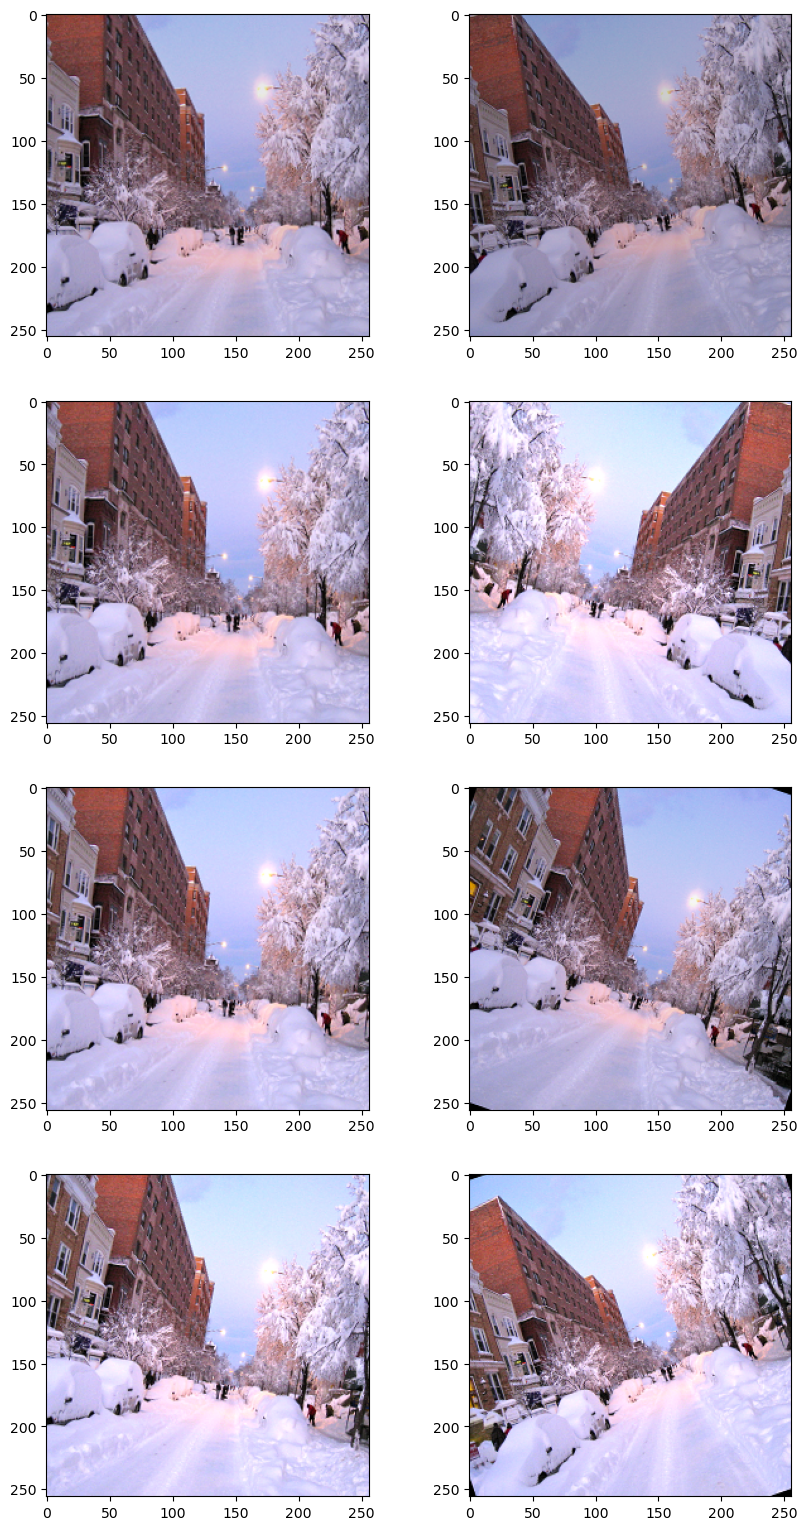

In [131]:
test_img = '3f63a70a78520377'

plt.figure(figsize=(10,200))
for i in range(8):
    im_bgr = cv2.imread("../Data/open_image_disaster/" + test_img +".jpg")
    img = im_bgr[:, :, ::-1]
    
    plt.grid(False)
    plt.subplot(40,2,i+1)
    plt.imshow(transform(image=img)["image"], cmap=plt.cm.binary)

plt.show()